<a href="https://colab.research.google.com/github/daniel-soler/learning-data-science-machine-learning/blob/main/Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles

# Creando el Dataset

In [3]:
# CREAR EL DATASET
n = 500
p = 2
X,y = make_circles(n_samples=n, factor=0.5, noise = 0.05)

In [4]:
X.shape

(500, 2)

In [5]:
y.shape

(500,)

In [6]:
y = y[:, np.newaxis]

In [7]:
y.shape

(500, 1)

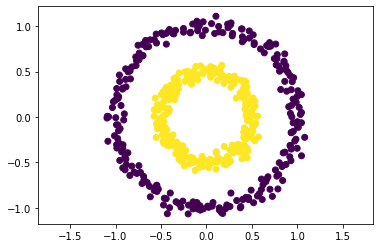

In [8]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])
plt.axis('equal')
plt.show()

# Red neuronal

In [9]:
#Creamos una clase para definir las capas de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
        
    self.b = np.random.rand(1, n_neur)*2-1
    self.W = np.random.rand(n_conn, n_neur)*2-1
    

In [10]:
#Funciones de activación

sigmoid = ( 
            lambda z : (1)/(1+ (np.e**(-z))),
            # lambda z : np.e**(-z) / ((1+np.e**(-z))**2)
            lambda a : a*(1-a)
          )

In [11]:
def create_nn(topology, act_f):
  '''
  Crea las capas internas y de la salida de la red. En la matriz decuelta no se incluye la cama de entrada de datos.
  '''
  
  nn = []
    
  for layer in range(1,len(topology)):
    nn.append(neural_layer(topology[layer-1], topology[layer] , act_f))
    
  return nn

In [12]:
#Definimos la función de coste [0] y su derivada [1]
l2_cost = (
            lambda y_predicted, y: np.mean((y_predicted - y)**2), 
            lambda y_predicted, y: 2*(y_predicted - y)
          )

In [13]:
#Función de entrenamiento
def train(neural_net, X, y = None, cost_f=None, learning_rate=0.1,train=False):
  '''
  Función de predicción y entrenamiento.
  '''

  outputs = [(None, X)] # (z, a) La salida de la capa de entrada, a, se establece como X

  # Forwarding

  for l in range(0,len(neural_net)):
    z = outputs[-1][1] @ neural_net[l].W  + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    outputs.append( (z, a) )


  # Backpropagation
  if train:
    deltas = []

    for l in reversed(range(0,len(neural_net))):

      # l+1 porque outputs también almacena la entrada y hay l capas
      z = outputs[l+1][0]
      a = outputs[l+1][1]

      if l == (len(neural_net)-1):
        dCda = cost_f[1](a,y)
        dadz = neural_net[l].act_f[1](a)
        deltas.insert(0, dCda*dadz)
      else:
        delta_L = deltas[0] # delta de la capa siguiente
        W_L = neural_net[l+1].W # W de la capa siguiente
        dadz = neural_net[l].act_f[1](a)
        deltas.insert(0, delta_L @ W_L.T * dadz)
    
    # Gradient descent

    for l in reversed(range(0,len(neural_net))):
      neural_net[l].b = neural_net[l].b - np.mean(deltas[l],axis=0,keepdims=True) * learning_rate
      neural_net[l].W = neural_net[l].W - (outputs[l][1].T @ deltas[l]) * learning_rate

  return outputs[-1][1]
  

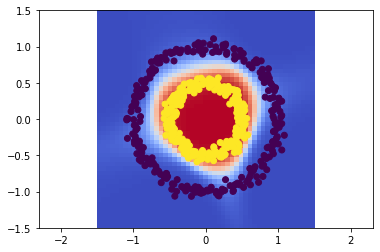

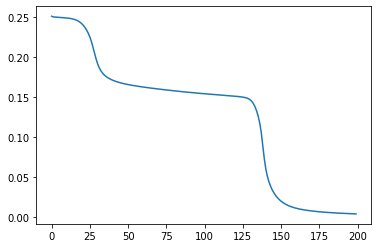

In [19]:
import time
from IPython.display import clear_output

topology = [p, 4, 8, 1]

neural_n = create_nn(topology, sigmoid)
loss = []

for i in range(5000):
    
  #Entrenamos la red:
  y_est = train(neural_n, X, y, l2_cost, learning_rate = 0.005,train=True)

  if i%25 == 0:
  
    loss.append(l2_cost[0](y_est,y))

    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _y = np.zeros((res, res))
        
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0,x1]])).item()

    #Visualizamos los resultados del entrenamiento.

    plt.pcolormesh(_x0, _x1, _y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[:, 0], X[:, 1], c = y )

    clear_output(wait = True)
    plt.show()
    plt.plot(range(0,len(loss)), loss)
    plt.show()
    time.sleep(0.005)